In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Machine():
    def __init__(self, a: tuple[int, int], b: tuple[int, int], prize: tuple[int, int]):
        self.a = a
        self.b = b
        self.prize = (prize[0]+10000000000000, prize[1]+10000000000000)

    def __str__(self):
        return f"Machine(A: {self.a}, B: {self.b}, Prize: {self.prize})"
    
    def __repr__(self):
        return self.__str__()
    
def parse_button_x_y(line):
    x, y = line.split(':')[1].strip().split(',')
    x = int(x.strip().split('+')[1])
    y = int(y.strip().split('+')[1])
    return x, y

def parse_prize_x_y(line):
    x, y = line.split(':')[1].strip().split(',')
    x = int(x.strip().split('=')[1])
    y = int(y.strip().split('=')[1])
    return x, y

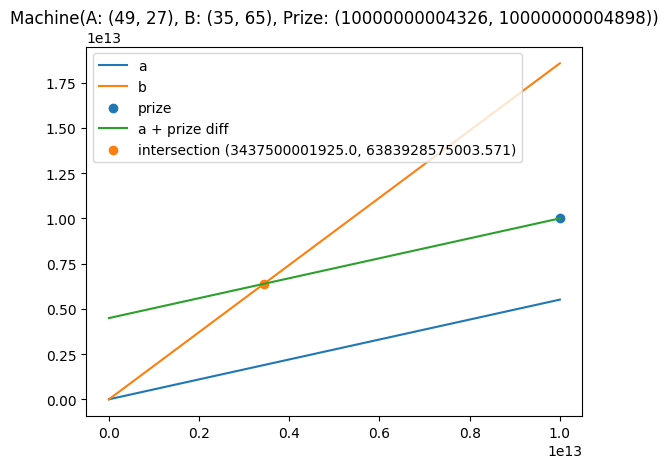

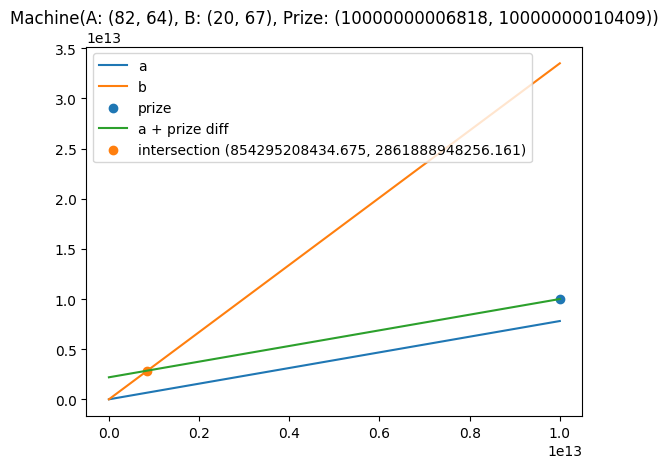

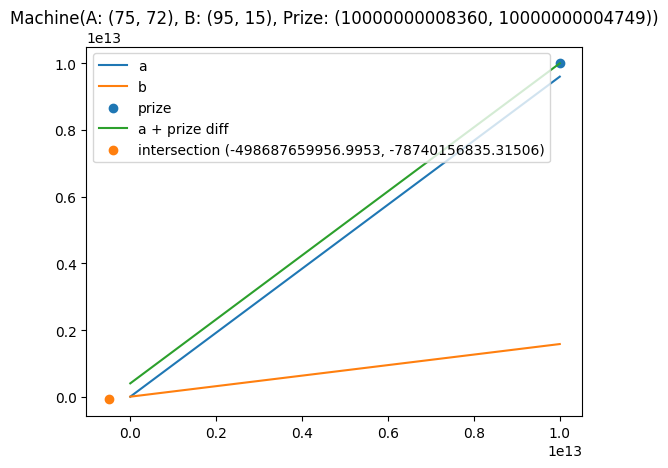

83232379451012


In [13]:
machines = []

with open('input.txt') as f:
    lines = f.readlines()
    for i in range(0, len(lines), 4):
        machines.append(Machine(parse_button_x_y(lines[i]), parse_button_x_y(lines[i+1]), parse_prize_x_y(lines[i+2])))

running_cost = 0
plot = False
for i, machine in enumerate(machines):
    ya = machine.a[1] / machine.a[0]
    yb = machine.b[1] / machine.b[0]

    if plot or i < 3:
        plt.title(machine)
        x = np.linspace(0, machine.prize[0], 100, dtype=int)
        # plot button a line
        plt.plot(x, ya * x, label='a')
        # plot button b line
        plt.plot(x, yb * x, label='b')
        # plot prize dot
        plt.scatter(machine.prize[0], machine.prize[1], label='prize')

        # raise a line by prize difference between a and prize y
        plt.plot(x, ya * x + (machine.prize[1] - ya * machine.prize[0]), label='a + prize diff')

    # find intersection between a+prize diff and b
    c = machine.prize[1] - ya * machine.prize[0]
    i_x = (c) / (yb - ya)
    i_y = ya * i_x + c

    if plot or i < 3:
        plt.scatter(i_x, i_y, label=f'intersection ({i_x}, {i_y})')
        plt.legend()
        plt.show()

    # number of times the b button needs to be pressed to reach intersection
    b_presses = np.round((i_x / machine.b[0]))

    # the number of times the a button needs to be pressed to reach prize from intersection
    a_presses = np.round(((machine.prize[0] - i_x) / machine.a[0]))

    cost = int(b_presses * 1 + a_presses * 3)

    x_answ = (b_presses * machine.b[0]) + (a_presses * machine.a[0])
    y_answ = (b_presses * machine.b[1]) + (a_presses * machine.a[1])

    if (x_answ, y_answ) != machine.prize:
        continue
    else:
        running_cost += cost


print(running_cost)